## Deadzone quantization

In [5]:
from IPython.display import Image, display

Downloaded http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png


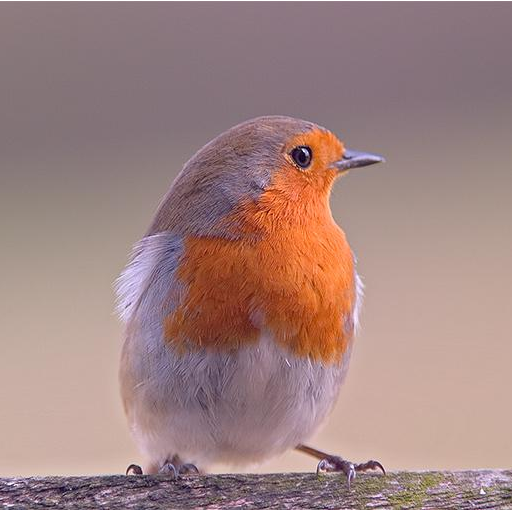

In [6]:
%run download_default_image.ipynb

In [7]:
!python ../src/deadzone.py encode -h

usage: deadzone.py encode [-h] [-q QSS]

options:
  -h, --help     show this help message and exit
  -q, --QSS QSS  Quantization step size (default: 32)


In [8]:
%%bash
python ../src/deadzone.py encode

(INFO) entropy_image_coding: Written 58983 bytes in /tmp/encoded.tif
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=32, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fd11a058f40>)


In [9]:
!python ../src/deadzone.py decode -h

usage: deadzone.py decode [-h] [-q QSS] [-f FILTER]

options:
  -h, --help           show this help message and exit
  -q, --QSS QSS        Quantization step size (default: 32)
  -f, --filter FILTER  Denoising filter (default: no_filter)


In [10]:
%%bash
python ../src/deadzone.py decode

(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=32, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f7347680c20>)


In [11]:
%%bash
python ../src/RDE.py

Code-stream file: /tmp/encoded.tif length: 58983
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 58995 bytes (1.80) bits/pixel
Decoded image: /tmp/decoded.png 62177 bytes (1.90) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 17.95
J = R + D = 19.75


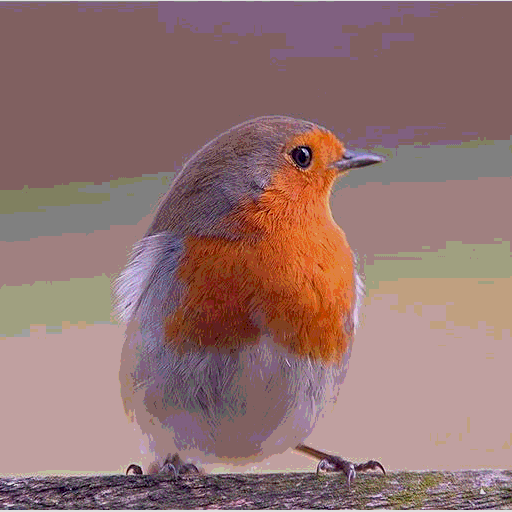

In [12]:
display(Image(filename="/tmp/decoded.png"))

### Decreasing QSS

In [13]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 1
python ../src/deadzone.py decode -q 1
python ../src/RDE.py

(INFO) entropy_image_coding: Written 275514 bytes in /tmp/encoded.tif
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=1, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fa31fa58f40>)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=1, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f47ec57cc20>)
Code-stream file: /tmp/encoded.tif length: 275514
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif'] 275514 bytes (8.41) bits/pixel
Decoded image: /tmp/decoded.png 215071 bytes (6.56) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 0.00
J = R + D = 8.41


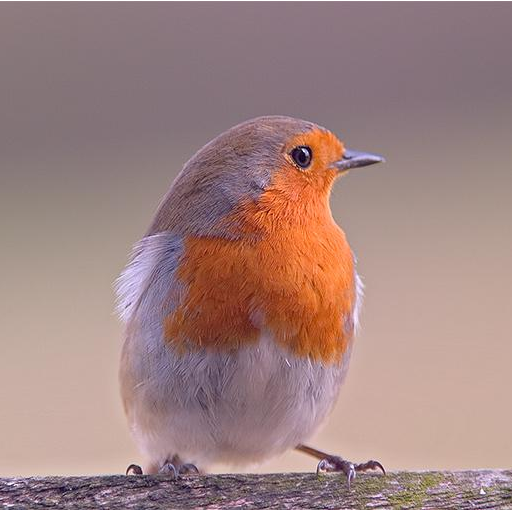

In [14]:
display(Image(filename="/tmp/decoded.png"))

### Increasing QSS

In [15]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 64
python ../src/deadzone.py decode -q 64
python ../src/RDE.py

(INFO) entropy_image_coding: Written 39349 bytes in /tmp/encoded.tif
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f36f6954f40>)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7fc5d3a80c20>)
Code-stream file: /tmp/encoded.tif length: 39349
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif'] 39349 bytes (1.20) bits/pixel
Decoded image: /tmp/decoded.png 44849 bytes (1.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.41
J = R + D = 39.62


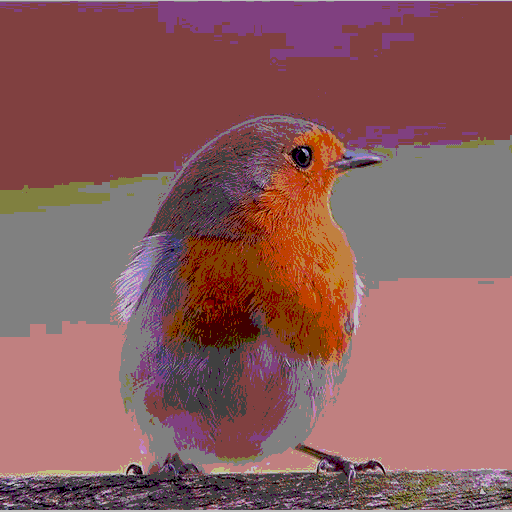

In [16]:
display(Image(filename="/tmp/decoded.png"))

### Using PNM

In [17]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 64 -c PNM
python ../src/deadzone.py decode -q 64 -c PNM
python ../src/RDE.py -c /tmp/encoded.pnm

(INFO) entropy_image_coding: Written 786447 bytes in /tmp/encoded.pnm
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='PNM', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f77a9858f40>)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='no_filter', entropy_image_codec='PNM', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f01dc680c20>)
Code-stream file: /tmp/encoded.pnm length: 786447
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.pnm'] 786447 bytes (24.00) bits/pixel
Decoded image: /tmp/decoded.png 44849 bytes (1.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.41
J = R + D = 62.42


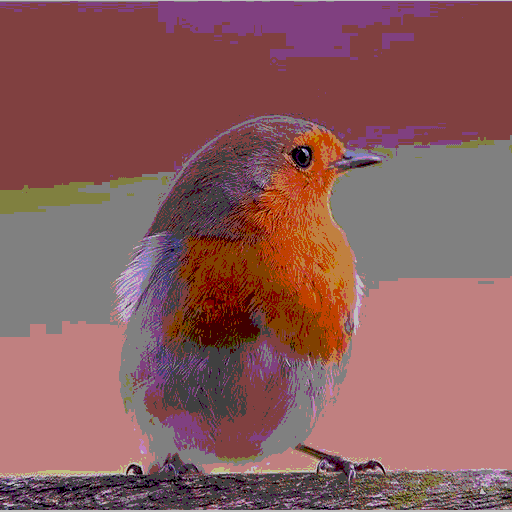

In [18]:
display(Image(filename="/tmp/decoded.png"))

### Using PNG
Which is the default entropy encoder.

In [19]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 64 -c PNG
python ../src/deadzone.py decode -q 64 -c PNG
python ../src/RDE.py -c /tmp/encoded.png

(INFO) entropy_image_coding: Written 43595 bytes in /tmp/encoded.png
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='PNG', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fcae5754f40>)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='no_filter', entropy_image_codec='PNG', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f4e1d17cc20>)
Code-stream file: /tmp/encoded.png length: 43595
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.png'] 43595 bytes (1.33) bits/pixel
Decoded image: /tmp/decoded.png 44849 bytes (1.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.41
J = R + D = 39.75


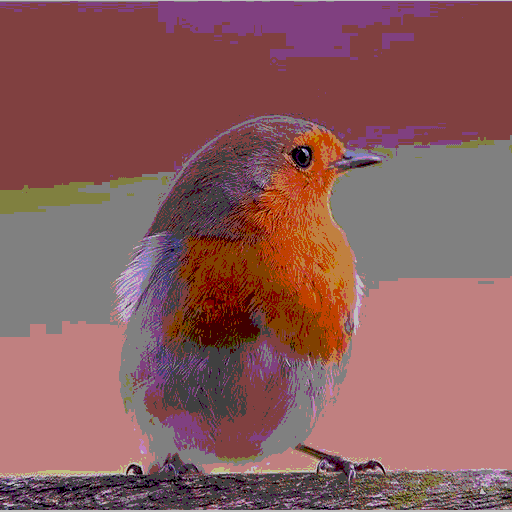

In [20]:
display(Image(filename="/tmp/decoded.png"))

### Using (static) Huffman

In [21]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 64 -c Huffman
python ../src/deadzone.py decode -q 64 -c Huffman
python ../src/RDE.py -c /tmp/encoded.huf

(INFO) Huffman: Length of the file "/tmp/encoded_huffman_tree.pkl.gz" (Huffman tree + image shape) = 272 bytes
(INFO) entropy_image_coding: Written 158875 bytes in /tmp/encoded.huf
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='Huffman', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fa827858f40>)
Node (786432)
│  ├─ Node (375128)
│  │  ├─ Node (109435)
│  │  │  ├─ '0' (29995)
│  │  │  └─ '3' (79440)
│  │  └─ '1' (265693)
│  └─ '2' (411304)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='no_filter', entropy_image_codec='Huffman', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f06cae80c20>)
Node (786432)
│  ├─ Node (375128)
│  │  ├─ Node (109435)
│  │  │  ├─ '0' (29995)
│  │  │  └─ '3' (79440)
│  │  └─ '1' (265693)
│  └─ '2' (411304)
Code-stream file: /tmp/encoded.huf length: 158875
Code-stream file: /tmp/encoded_huffman_tree.pkl.gz length: 272
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.huf', '/tmp/encoded_huffman_tree.pkl.gz'] 159147 bytes (4.86) bits/pixel
Decoded image: /tmp/decoded.png 44849 bytes (1.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.41
J = R + D = 43.27


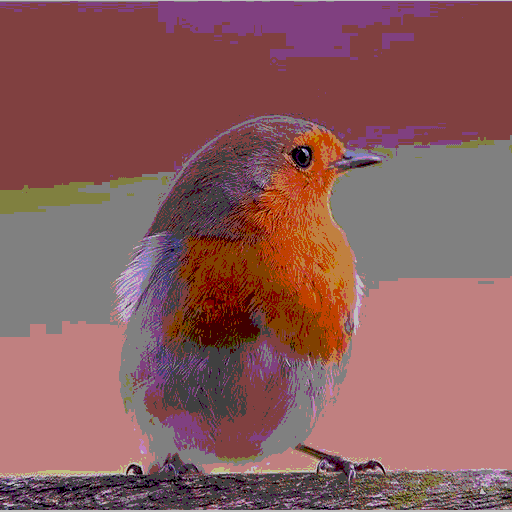

In [22]:
display(Image(filename="/tmp/decoded.png"))

### Using zlib

In [23]:
%%bash
rm /tmp/encoded*
python ../src/deadzone.py encode -q 64 -c z_lib
python ../src/deadzone.py decode -q 64 -c z_lib
python ../src/RDE.py -c /tmp/encoded.npz

(INFO) entropy_image_coding: Written 39347 bytes in /tmp/encoded.npz
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='z_lib', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7ff9a0058f40>)


(INFO) deadzone: quantizer = dead-zone


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='no_filter', entropy_image_codec='z_lib', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f90ab97cc20>)
Code-stream file: /tmp/encoded.npz length: 39347
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.npz'] 39347 bytes (1.20) bits/pixel
Decoded image: /tmp/decoded.png 44849 bytes (1.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.41
J = R + D = 39.62


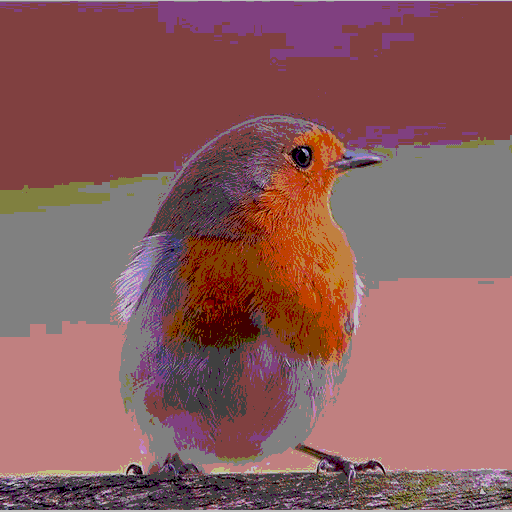

In [24]:
display(Image(filename="/tmp/decoded.png"))

### Using a blurring filter

In [27]:
%%bash
python ../src/deadzone.py encode -q 64
python ../src/deadzone.py decode -q 64 -f gaussian_blur -s 5
python ../src/RDE.py

(INFO) entropy_image_coding: Written 39349 bytes in /tmp/encoded.tif
(INFO) deadzone: quantizer = dead-zone


main Namespace(debug=False, subparser_name='encode', QSS=64, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fe0f9354f40>)


(INFO) gaussian_blur: filter size=5
(INFO) deadzone: quantizer = dead-zone


Denoising filter = gaussian_blur
main Namespace(debug=False, subparser_name='decode', QSS=64, filter='gaussian_blur', filter_size=5, entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f32c1680c20>)
Code-stream file: /tmp/encoded.tif length: 39349
Code-stream file: /tmp/encoded.npz length: 39347
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.npz'] 78696 bytes (2.40) bits/pixel
Decoded image: /tmp/decoded.png 145117 bytes (4.43) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 38.27
J = R + D = 40.68


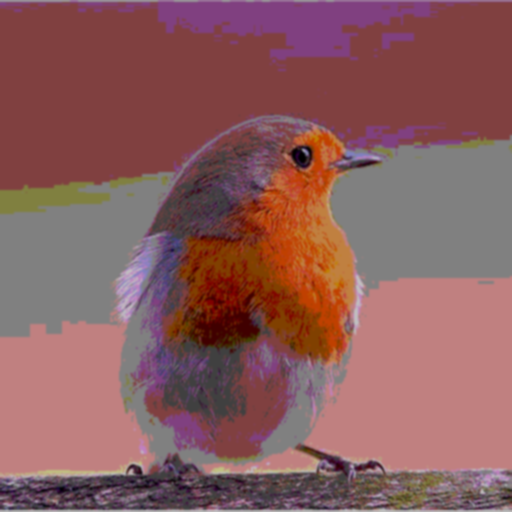

In [28]:
display(Image(filename="/tmp/decoded.png"))